# Kleiner Test

In [48]:
from n2 import ConnectGene, NodeGene, NodeTypes, Individuum
import numpy as np
import gymnasium as gym

In [49]:
def simplest_ind(n_inputs, n_outputs, bias=False):
    node_genes = []
    connect_genes = []
    for i in range(n_inputs):
        node_genes.append(NodeGene(NodeTypes.Input))
    for i in range(n_outputs):
        node_genes.append(NodeGene(NodeTypes.Output))
    if bias:
        node_genes.append(NodeGene(NodeTypes.Bias))
        
    for i in range(n_inputs):
        for j in range(n_outputs):
            connect_genes.append(ConnectGene(node_genes[i].marking, node_genes[j+n_inputs].marking, np.random.uniform(low=-1, high=1)))
    return Individuum(node_genes, connect_genes)

In [50]:
POP_SIZE = 3
GENERATIONS = 100
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 1.0,
    'node': 0.0
}
MUTATE_BIG = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.3,
    'node': 0.03
}

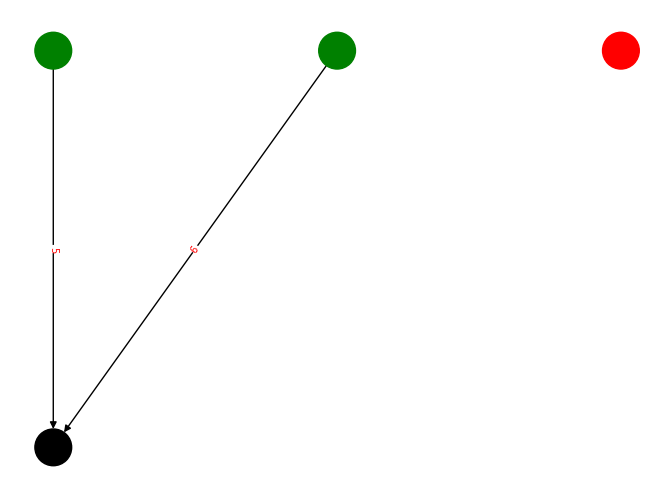

In [51]:
ind = simplest_ind(2, 1, bias=True)
ind.plot()

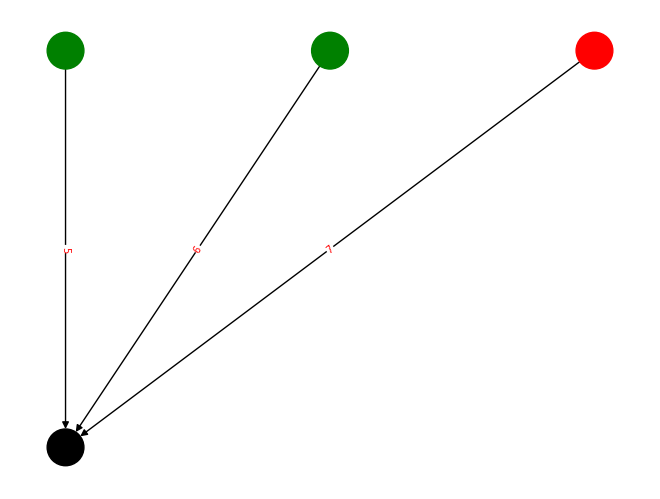

In [52]:
from IPython.display import clear_output

ind.mutate(MUTATE_SMALL)
ind.plot()

In [53]:
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.0,
    'node': 1.0
}

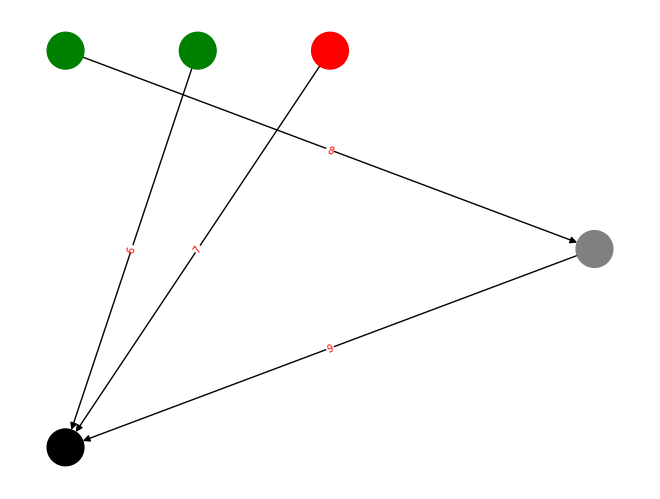

In [54]:
ind.mutate(MUTATE_SMALL)
ind.plot()

In [55]:
ind.printsum()

Node: 5
Node: 6
Node: 7
Node: 8
Node: 9
Connect: 5
In Node: 5
Out Node: 7
Weight: -0.8121619727511851
Disabled: True

Connect: 6
In Node: 6
Out Node: 7
Weight: -0.8963104936994106
Disabled: False

Connect: 7
In Node: 8
Out Node: 7
Weight: -0.7548272052035752
Disabled: False

Connect: 8
In Node: 5
Out Node: 9
Weight: -1.026251805591483
Disabled: False

Connect: 9
In Node: 9
Out Node: 7
Weight: 0.6923537830277102
Disabled: False



In [56]:
inp = np.array([[0,0],[0,1],[1,0],[1,1]])
out = np.array([[0],[1],[1],[0]])

def fitness(ind: Individuum):
    ind.fitness = 0
    for i,o in zip(inp,out):
        raw = ind.forward(i)
        rounded = raw.round()
        if rounded == o: 
            ind.fitness += 1
    return ind.fitness

In [57]:
print([ind.forward(inp[i]) for i in range(4)])
print(fitness(ind))

[array([0.34617689]), array([-0.5501336]), array([0.00439377]), array([-0.89191673])]
1


In [58]:
MUTATE_SMALL = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 0.0,
    'node': 1.0
}

In [59]:
ConnectGene.marking = 0
NodeGene.marking = 0
mom = simplest_ind(2, 1, bias=True)
print("mom")
mom.printsum()
dad = Individuum.copy(mom)
print("dad")
dad.printsum()
print("mutated dad")
dad.mutate(MUTATE_SMALL)
dad.printsum()

mom
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.9360362948670142
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.15163765587120315
Disabled: False

dad
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.9360362948670142
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.15163765587120315
Disabled: False

mutated dad
Node: 0
Node: 1
Node: 2
Node: 3
Node: 4
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.9619147001072091
Disabled: True

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.2588163818311121
Disabled: False

Connect: 2
In Node: 0
Out Node: 4
Weight: -0.018479698621625944
Disabled: False

Connect: 3
In Node: 4
Out Node: 2
Weight: 2.0165964933906513
Disabled: False



In [60]:
print(fitness(dad))
print(fitness(mom))

2
2


In [61]:
child = mom.crossover(dad)

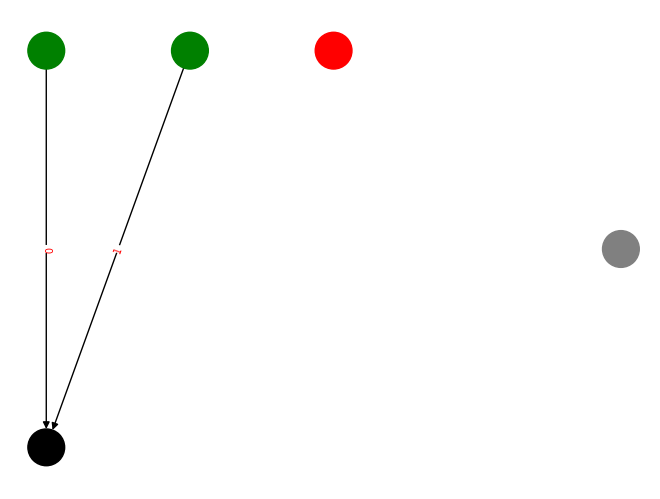

Node: 0
Node: 1
Node: 2
Node: 3
Node: 4
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.9360362948670142
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.2588163818311121
Disabled: False



In [62]:
child.plot()
child.printsum()

In [63]:
MUTATE_ON_WEIGHT = {
    'weight': {
        'rate': 0.9,
        'reset': 0.1
    },
    'connection': 0.0,
    'node': 0.0
}

In [64]:
ConnectGene.marking = 0
NodeGene.marking = 0
mom = simplest_ind(2, 1, bias=True)
print("mom")
mom.printsum()
dad = Individuum.copy(mom)
print("dad")
dad.printsum()
print("mutated dad")
dad.mutate(MUTATE_ON_WEIGHT)
dad.printsum()

mom
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.46049393340025935
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.6051764214573987
Disabled: False

dad
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.46049393340025935
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.6051764214573987
Disabled: False

mutated dad
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: 0.4072408544623498
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: -0.4825346006879744
Disabled: False



In [65]:
mom.distance(dad, 1, 1, 0.4)

0.03517897994146677

In [66]:
MUTATE_DISTANCE_TEST = {
    'weight': {
        'rate': 0.8,
        'reset': 0.1
    },
    'connection': 2.0,
    'node': 1.0
}

In [67]:
ConnectGene.marking = 0
NodeGene.marking = 0
mom = simplest_ind(2, 1, bias=True)
print("mom")
mom.printsum()
dad = Individuum.copy(mom)
print("dad")
dad.printsum()
print("mutated dad")
dad.mutate(MUTATE_DISTANCE_TEST)
dad.printsum()

mom
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: -0.06021508036727696
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: 0.13237405714164874
Disabled: False

dad
Node: 0
Node: 1
Node: 2
Node: 3
Connect: 0
In Node: 0
Out Node: 2
Weight: -0.06021508036727696
Disabled: False

Connect: 1
In Node: 1
Out Node: 2
Weight: 0.13237405714164874
Disabled: False

mutated dad
Node: 0
Node: 1
Node: 2
Node: 3
Node: 4
Connect: 0
In Node: 0
Out Node: 2
Weight: -0.07829867839018338
Disabled: True

Connect: 1
In Node: 1
Out Node: 2
Weight: 0.1748189895803683
Disabled: False

Connect: 2
In Node: 3
Out Node: 2
Weight: 0.2663459849033084
Disabled: False

Connect: 3
In Node: 0
Out Node: 4
Weight: 2.347149675127981
Disabled: False

Connect: 4
In Node: 4
Out Node: 2
Weight: 0.21090653428478492
Disabled: False



In [68]:
mom.distance(dad, 1, 1, 0.4)

0.6121057060923252